In [33]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

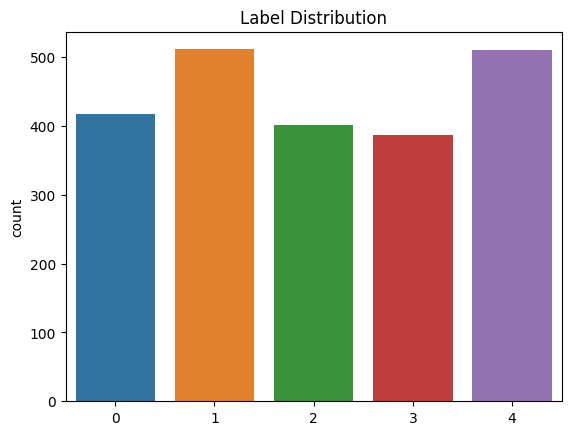

In [34]:
text_df = pd.read_csv("./df_file.csv")

X = text_df['Text'].tolist()
y = text_df['Label'].tolist()

sns.countplot(x=y)
plt.title('Label Distribution')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Tokenize the text (fit on training data only)
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [20]:
# Pad sequences to have consistent length
max_len = 100  # You can adjust this based on your dataset
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [21]:
# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
num_embeddings = min(500, 5/2)
num_embeddings

2.5

In [43]:
# Build the CNN model
embedding_dim = 1000 #50
vocab_size = min(max_words, len(tokenizer.word_index) + 1)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 1000)         1000000   
                                                                 
 conv1d_10 (Conv1D)          (None, 96, 128)           640128    
                                                                 
 global_max_pooling1d_6 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 5)                 165       
                                                      

In [44]:
# Train the model
callback = EarlyStopping(monitor='loss', patience=5)
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[callback])

Epoch 1/100
26/26 [==============================] - 7s 234ms/step - loss: 1.5284 - accuracy: 0.3577 - val_loss: 1.3564 - val_accuracy: 0.4438
Epoch 2/100
26/26 [==============================] - 6s 241ms/step - loss: 1.1241 - accuracy: 0.5743 - val_loss: 0.9344 - val_accuracy: 0.7079
Epoch 3/100
26/26 [==============================] - 7s 257ms/step - loss: 0.5909 - accuracy: 0.8277 - val_loss: 0.5744 - val_accuracy: 0.8034
Epoch 4/100
26/26 [==============================] - 7s 263ms/step - loss: 0.1720 - accuracy: 0.9688 - val_loss: 0.4339 - val_accuracy: 0.8427
Epoch 5/100
26/26 [==============================] - 8s 312ms/step - loss: 0.0414 - accuracy: 0.9981 - val_loss: 0.3525 - val_accuracy: 0.8933
Epoch 6/100
26/26 [==============================] - 8s 309ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.3449 - val_accuracy: 0.9157
Epoch 7/100
26/26 [==============================] - 7s 270ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3405 - val_accuracy: 0.9045

In [45]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Make predictions on new data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels))

14/14 [==============================] - 0s 31ms/step - loss: 0.3731 - accuracy: 0.9079
Test accuracy: 0.9078651666641235
14/14 [==============================] - 1s 31ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        84
           1       0.93      0.99      0.96       102
           2       0.87      0.89      0.88        80
           3       0.97      0.84      0.90        77
           4       0.89      0.90      0.90       102

    accuracy                           0.91       445
   macro avg       0.91      0.90      0.91       445
weighted avg       0.91      0.91      0.91       445

